Pemanggilan Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score

import sys

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

Load Dataset

In [ ]:
df = pd.read_csv('/content/dataset.csv')
print(df.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [ ]:
df1 = pd.read_csv('/content/Symptom-severity.csv')
print(df1.head())

                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5


Melihat Informasi Umum pada Dataset

In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


Melihat Jumlah Data dan Atributnya

In [ ]:
df.shape

(4920, 18)

In [ ]:
df1.shape

(133, 2)

Melihat Distribusi Jumlah Masing-Masing Penyakit pada Dataset

In [ ]:
print(df.Disease.value_counts())

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

Pembersihan Data

In [ ]:
df.isna().sum()
df.isnull().sum()

cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Konversi Tiap-Tiap Gejala ke Dalam Bentuk Bobot Masing-masing

In [ ]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Merubah List penyakit ke dalam Numerik

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

label_encoder = LabelEncoder()
df['Disease'] = label_encoder.fit_transform(df['Disease'])
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,2,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,38,6,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,35,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values
labels

array([15, 15, 15, ..., 38, 35, 27])

Melihat Korelasi Antar Gejala pada Dataset

In [ ]:
df.corr()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
Disease,1.000000,0.089193,0.135498,-0.246687,-0.003541,0.112882,0.237500,0.244938,0.233483,0.215499,0.188165,0.139569,0.064377,0.063096,0.031503,0.071761,0.063014,-0.102996
Symptom_1,0.089193,1.000000,-0.146419,0.056128,0.146103,-0.107899,-0.020089,-0.167150,-0.193221,-0.179147,-0.179695,-0.098569,-0.011184,0.006645,0.010002,0.014025,0.005112,0.054539
Symptom_2,0.135498,-0.146419,1.000000,0.115827,0.090560,0.060731,-0.132511,-0.082145,-0.106352,-0.113552,-0.140147,-0.086057,-0.034644,-0.061888,-0.054663,-0.016947,-0.006225,-0.113490
Symptom_3,-0.246687,0.056128,0.115827,1.000000,-0.024115,0.107116,0.014875,-0.052545,-0.088597,-0.108398,-0.098737,-0.116774,-0.045480,0.005315,-0.044110,-0.017018,-0.005994,-0.003849
Symptom_4,-0.003541,0.146103,0.090560,-0.024115,1.000000,0.192865,0.255670,0.227431,0.138142,0.160603,0.142271,0.185036,0.096312,0.090282,0.036258,-0.013741,-0.014766,0.010907
Symptom_5,0.112882,-0.107899,0.060731,0.107116,0.192865,1.000000,0.551814,0.469017,0.430586,0.373502,0.332272,0.269372,0.178673,0.169743,0.235818,0.235701,0.168063,0.218260
Symptom_6,0.237500,-0.020089,-0.132511,0.014875,0.255670,0.551814,1.000000,0.682837,0.574690,0.525865,0.510769,0.422528,0.393040,0.284831,0.269362,0.212757,0.223633,0.017640
Symptom_7,0.244938,-0.167150,-0.082145,-0.052545,0.227431,0.469017,0.682837,1.000000,0.802102,0.727088,0.665241,0.564638,0.417492,0.368414,0.265152,0.253330,0.232676,0.205205
Symptom_8,0.233483,-0.193221,-0.106352,-0.088597,0.138142,0.430586,0.574690,0.802102,1.000000,0.904514,0.804851,0.635868,0.470393,0.421599,0.314389,0.267335,0.214612,0.232835
Symptom_9,0.215499,-0.179147,-0.113552,-0.108398,0.160603,0.373502,0.525865,0.727088,0.904514,1.000000,0.886842,0.675044,0.474840,0.411184,0.317222,0.288592,0.233379,0.186614


Pembagian Data Training dan Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size = 0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
y_train

(3936, 17) (984, 17) (3936,) (984,)


array([19, 28, 26, ...,  4,  3, 10])

Membangun Model dengan Metode Neural Networks

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=17, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(41, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
             metrics=['accuracy'])
y_train

array([19, 28, 26, ...,  4,  3, 10])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995 and logs.get('val_accuracy')>0.995):
      print("\nAkurasi train dan validasi didapat telah mencapai nilai > 99.5%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(x_train,y_train, epochs=2000, batch_size=32, validation_data=(x_test, y_test), callbacks=[callbacks])

Epoch 1/2000
123/123 [==============================] - 1s 5ms/step - loss: 3.6379 - accuracy: 0.0396 - val_loss: 3.4154 - val_accuracy: 0.0478
Epoch 2/2000
123/123 [==============================] - 0s 2ms/step - loss: 3.1391 - accuracy: 0.1179 - val_loss: 2.7083 - val_accuracy: 0.1778
Epoch 3/2000
123/123 [==============================] - 0s 3ms/step - loss: 2.3454 - accuracy: 0.2744 - val_loss: 1.9382 - val_accuracy: 0.4756
Epoch 4/2000
123/123 [==============================] - 0s 3ms/step - loss: 1.6611 - accuracy: 0.5582 - val_loss: 1.3857 - val_accuracy: 0.6220
Epoch 5/2000
123/123 [==============================] - 0s 3ms/step - loss: 1.2376 - accuracy: 0.6692 - val_loss: 1.1195 - val_accuracy: 0.6748
Epoch 6/2000
123/123 [==============================] - 0s 3ms/step - loss: 1.0059 - accuracy: 0.7299 - val_loss: 0.9369 - val_accuracy: 0.7317
Epoch 7/2000
123/123 [==============================] - 0s 3ms/step - loss: 0.8629 - accuracy: 0.7538 - val_loss: 0.8324 - val_accuracy:

In [ ]:
mlp_pred = model.predict(x_test)

Membangun Model Menggunakan Random Forest

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100)
model1.fit(x_train, y_train)

pred = model1.predict(x_test)

Visualisasi Grafik Akurasi Training dan Validasi

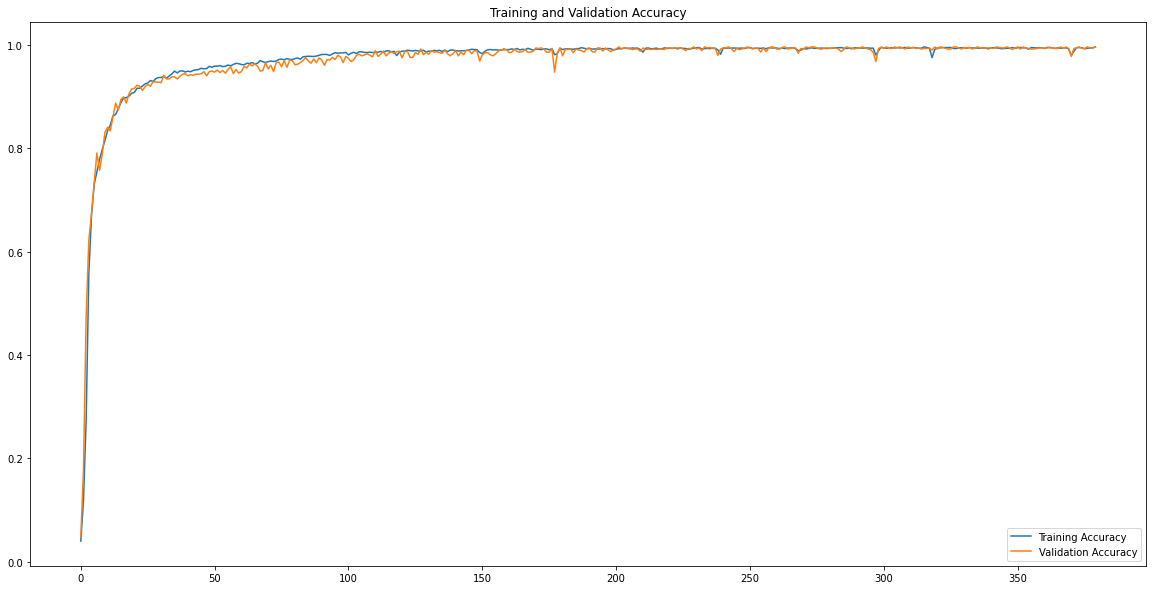

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 10))

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

Visualisasi Grafik Loss Training dan Validasi

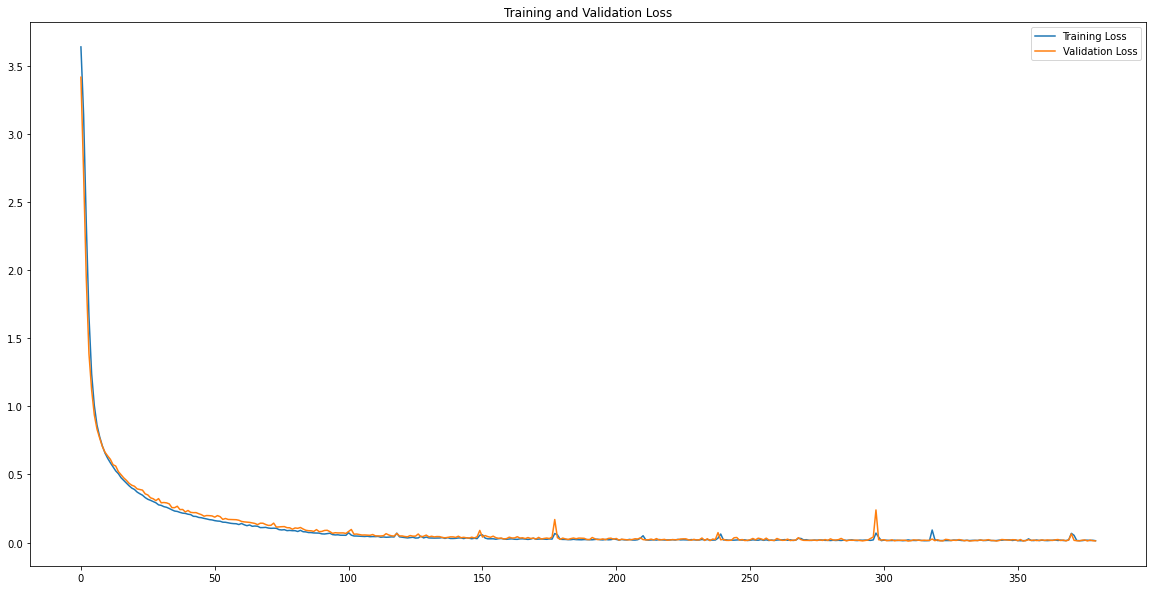

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Confusion Matriks Kinerja Metode Neural Networks

F1-score = 99.60947927141072 
 Accuracy = 99.59349593495935 
 Recall = 99.64602876798 
 Presisi = 99.60243009023496


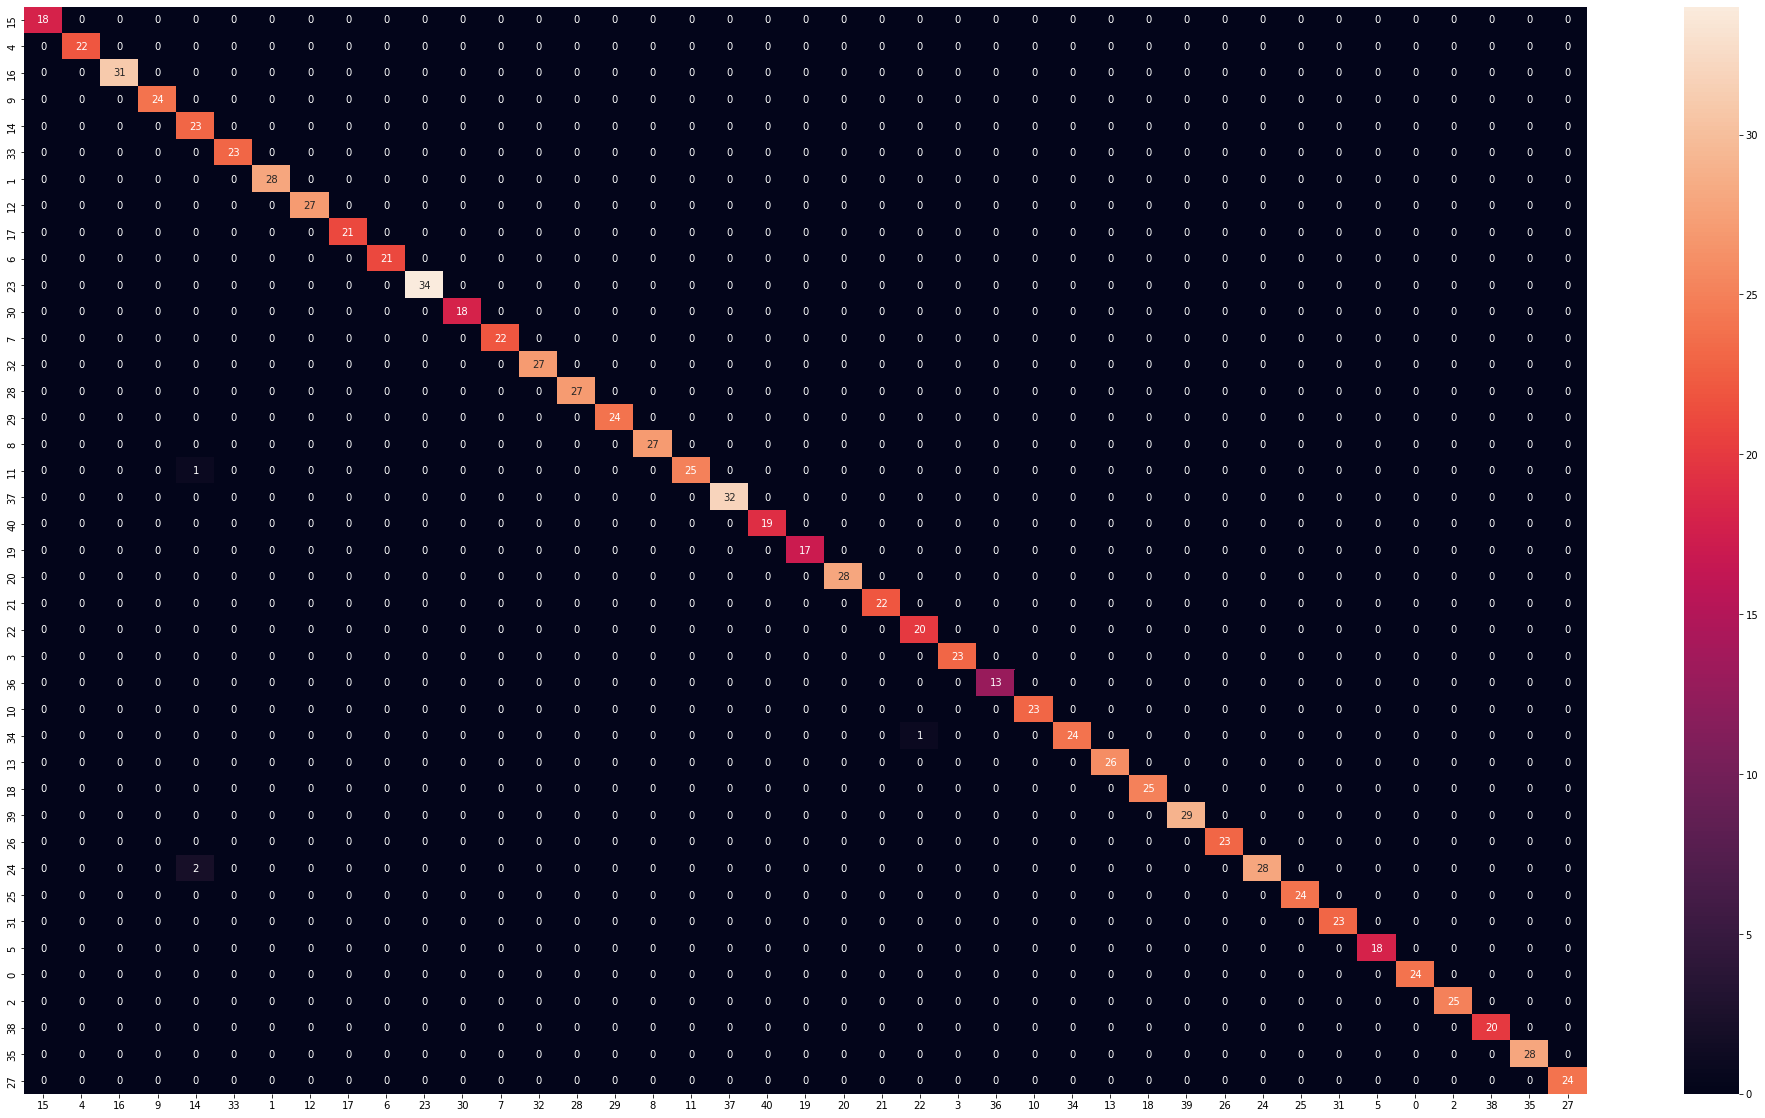

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(35,20))
mlp_pred = np.argmax(mlp_pred, axis=1)
conf_mlp = confusion_matrix(y_test, mlp_pred)
mlp_cm = pd.DataFrame(conf_mlp, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score =', f1_score(y_test, mlp_pred, average='macro')*100, "\n" , 
      'Accuracy =', accuracy_score(y_test, mlp_pred)*100, "\n" ,
      'Recall =', recall_score(y_test, mlp_pred, average='macro')*100, "\n",
      'Presisi =', precision_score(y_test, mlp_pred, average='macro')*100)
sns.heatmap(mlp_cm, annot=True)

Mengecek Kinerja Model Random Forest dengan Confussion Matrix

F1-score = 99.40499454843616 
 Accuracy = 99.39024390243902 
 Recall = 99.4653602946286 
 Presisi = 99.40044049269925


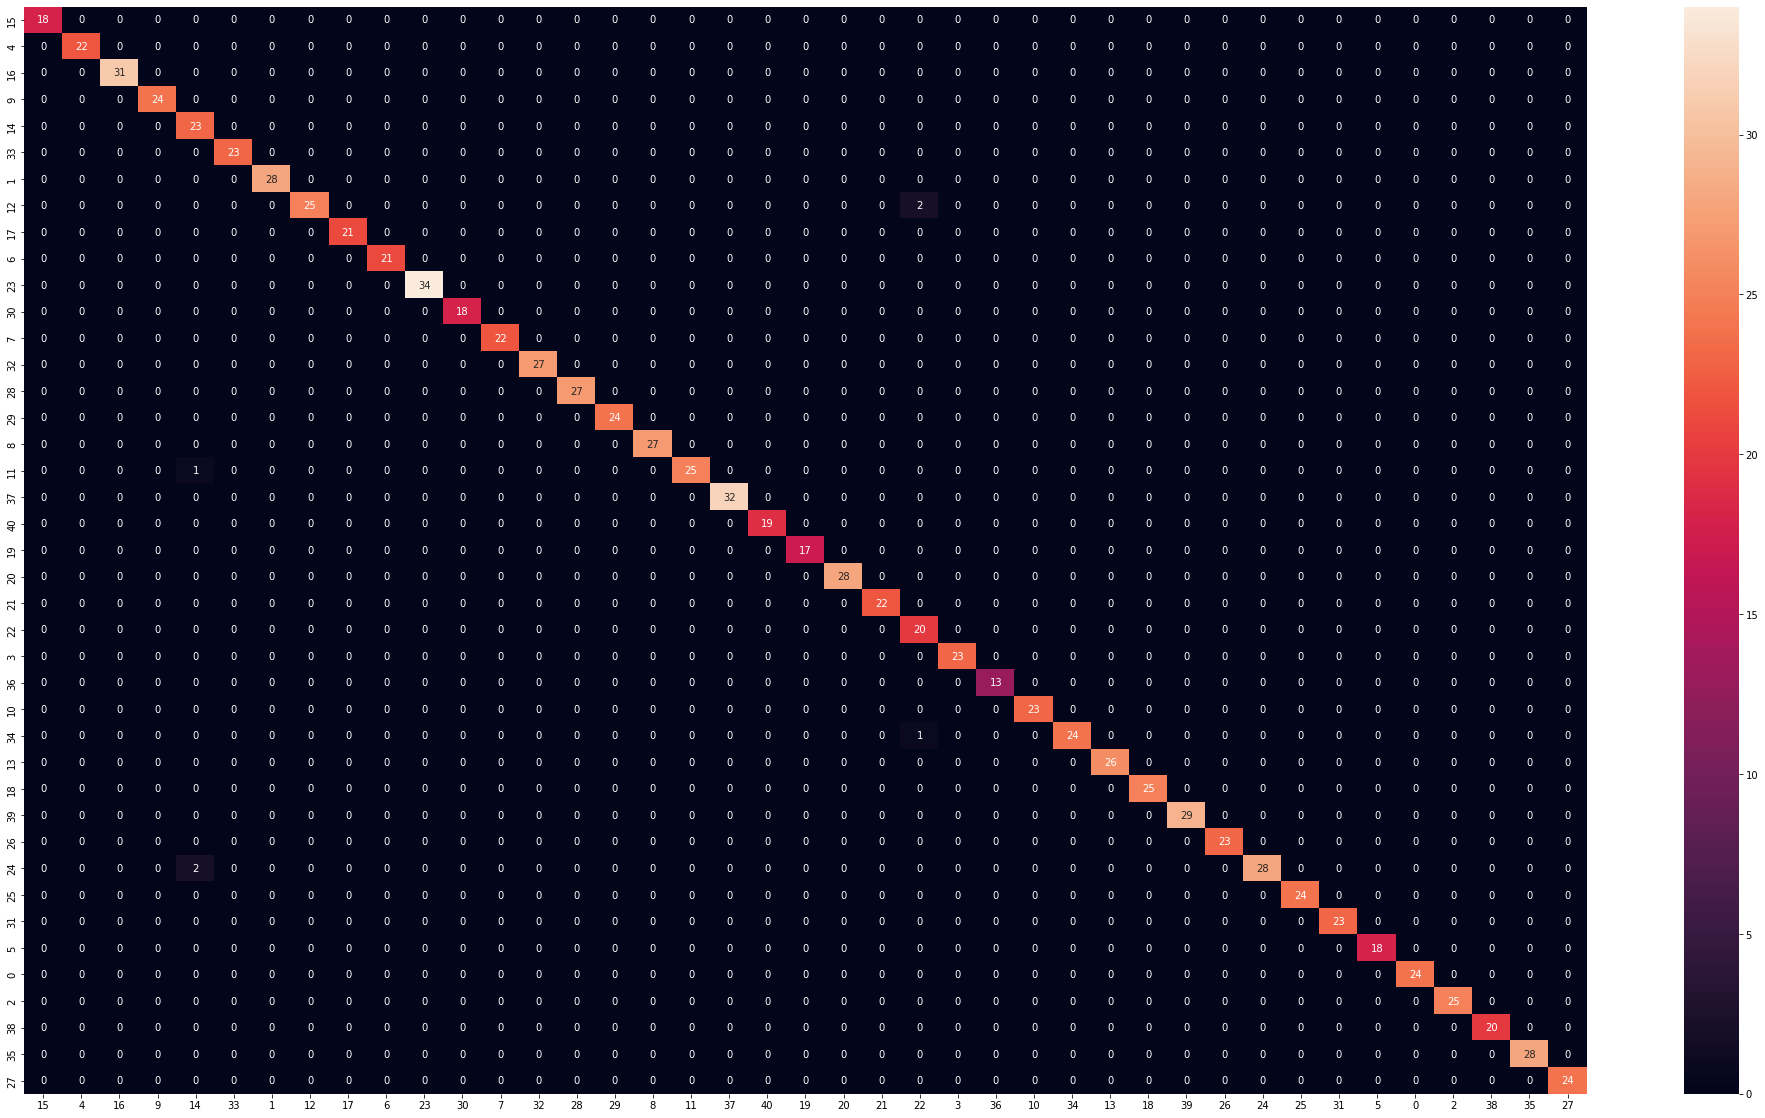

In [ ]:
fig, ax = plt.subplots(figsize=(35,20))
conf_rf = confusion_matrix(y_test, pred)
df_rf = pd.DataFrame(conf_rf, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score =', f1_score(y_test, pred, average='macro')*100, '\n', 
      'Accuracy =', accuracy_score(y_test, pred)*100, '\n',
      'Recall =', recall_score(y_test, pred, average='macro')*100, "\n",
      'Presisi =', precision_score(y_test, pred, average='macro')*100)
sns.heatmap(df_rf, annot=True)

Grafik Perbandingan Kinerja Metode Neural Networks dan Random Forest

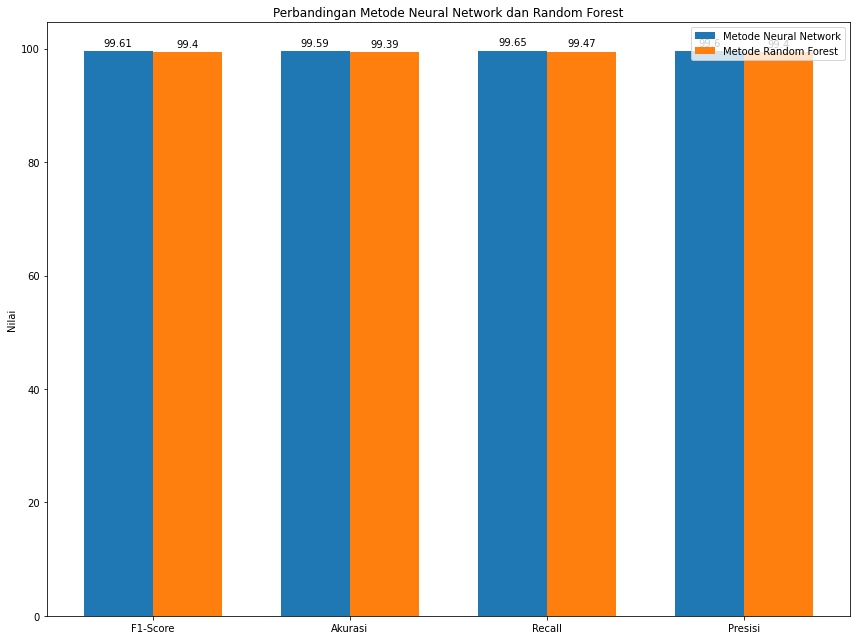

In [ ]:
import matplotlib.pyplot as plt

labels = ['F1-Score', 'Akurasi', 'Recall', 'Presisi']
kinerja_mlp = [round(f1_score(y_test, mlp_pred, average='macro')*100,2),
               round(accuracy_score(y_test, mlp_pred)*100,2),
               round(recall_score(y_test, mlp_pred, average='macro')*100,2),
               round(precision_score(y_test, mlp_pred, average='macro')*100,2)]
               
kinerja_rf = [round(f1_score(y_test, pred, average='macro')*100,2),
              round(accuracy_score(y_test, pred)*100,2),
              round(recall_score(y_test, pred, average='macro')*100,2),
              round(precision_score(y_test, pred, average='macro')*100,2)]

# create plot
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 9))
rects1 = ax.bar(x - width/2, kinerja_mlp, width, label='Metode Neural Network')
rects2 = ax.bar(x + width/2, kinerja_rf, width, label='Metode Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nilai')
ax.set_title('Perbandingan Metode Neural Network dan Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
# simpan model

import pickle
pickle.dump(model1, open("model_hc_8.pkl", "wb"))

In [ ]:
# load model

model = pickle.load(open("/content/model_hc_8.pkl", "rb"))

# Gunakan  model untuk Prediksi penyakit
X_test = np.array([[1,2,5,4,3,4,5,0,0,0,0,0,0,0,0,0,0]]) 
y_pred = model.predict(X_test)
y_pred

array([28])